# Grafer
I denne innleveringen skal du implementere ulike konsepter og algoritmer relatert til grafer. Oppgavene er gitt underveis i dette dokumentet. Du skal fylle inn dine implementasjoner og din tekst underveis, der dette er markert. 

Kode testes direkte i notebook'en, i celler som starter med %ipytest. Ipytest er "notebook-versjonen" av pytest. For å kunne bruke dette må du først installere pakken ipytest:

    pip install ipytest

I tillegg skal du bruke noe ferdig implementert kode som ligger i fila graph_tools.py . Koden brukes for å lese "labyrinter" kodet som tekstfiler, under mappa "mazes". Noen av metodene som du skal implementere skal brukes for å finne veien gjennom disse labyrintene. 

In [2]:
# Imports
from graphviz import Digraph, Graph
from typing import Any
import ipytest
import matplotlib.pyplot as plt

import graph_tools as gt

In [3]:
# Set up pytest for Jupyter notebooks
ipytest.autoconfig()

## Oppgave 1: Lag en adjacency list
Lag en adjacency list for hver av de to grafene under. Bruk en dictionary, la nøklene tilsvare navnet på hver node, og la verdiene være en liste med navnet på alle nabonodene. 

Legg merke til at graf a) er "urettet" og at graf b) er "rettet".


a) ![alt text](images/example_graph.svg)         b) ![alt text ](images/example_directed_graph.svg) 

In [4]:
# Kode for oppgave 1
graph_a_adjacency_list = {
    "A" : ["D"],
    "B" : ["G"],
    "C" : ["E", "G"],
    "D" : ["A", "E", "F", "G", "H"],
    "E" : ["C", "D", "G", "H"],
    "F" : ["D"],
    "G" : ["B", "C", "D", "E", "H"],
    "H" : ["D", "E", "G"]
    }

graph_b_adjacency_list = {
    "A" : ["C"],
    "B" : ["D"],
    "C" : ["A", "E"],
    "D" : ["A", "C", "E"],
    "E" : ["A", "B"],
    "F" : ["A", "D"]
    }

## Oppgave 2: Vis graf med graphviz
Bruk dine adjacency lists som du har definert over, og skriv kode for å vise grafene som bilder. Bruk Graph- og Digraph-objekter fra graphviz-biblioteket (for rettede og urettede grafer). Hvis alt fungerer bør grafene se lik ut som bildet over. Metode for å gjøre dette er vist i videoer for denne modulen. 

Tips: For å unngå doble kanter mellom nodene i en urettet graf kan du bruke Graph(strict=True).

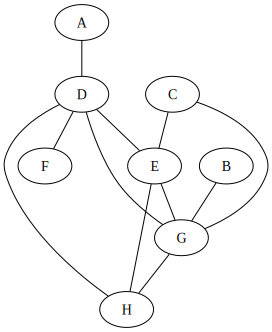

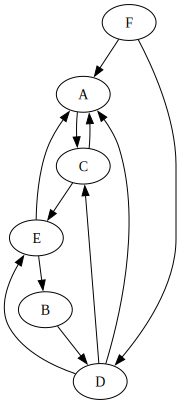

In [5]:
# Kode for oppgave 2
dot_a = Graph(strict=True)
for node in graph_a_adjacency_list:
    dot_a.node(name=node, label=node)
    for edge_node in graph_a_adjacency_list[node]:
        dot_a.edge(node, edge_node)

dot_b = Digraph(strict=True)
for node in graph_b_adjacency_list:
    dot_b.node(name=node, label=node)
    for edge_node in graph_b_adjacency_list[node]:
        dot_b.edge(node, edge_node)

display(dot_a)
display(dot_b)


## Bruk av labyrinter som eksempler på grafer
I neste oppgave skal du implementere kode for å traversere en graf. Koden skal også testes. I noen av testene brukes "labyrinter" som eksempler på grafer. Her er en kort introduksjon til hvordan disse fungerer.

Labyrintene er kodet som tekst, der "#" tilsvarer vegger og "." tilsvarer åpne rom. Her er et eksempel:

In [6]:
maze_text = gt.read_maze_text("mazes/maze_3way.txt")
for line in maze_text:  # list, each element is one text line
    print(line)

#######
#.....#
#.#.#.#
###..##
#######


Hver rute i labyrinten har et unikt sett med koordinater, oppgitt som (linjenummer, kolonnenummer). Vi kan visualisere dette gjennom å konvertere teksten over til et 2D NumPy array (dere får lære mer om dette senere), og vise dette som et bilde. På bildet er "veggene" mørkeblå og "gangene" gule. 

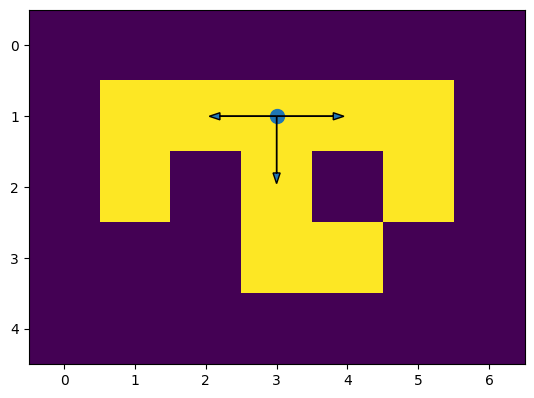

In [7]:
maze_array = gt.maze_text_to_matrix(maze_text)
_ = plt.imshow(maze_array)
_ = plt.scatter(y=1, x=3, s=100)
gt.plot_maze_edges({(1, 3): [(1, 2), (2, 3), (1, 4)]})

Her ser vi for eksempel at rute (1,3) (markert med en prikk) har tre nabo-ruter som man kan bevege seg til: 

- (1,2) (venstre)
- (2,3) (nedover)
- (1,4) (høyre)

Vi kan representere labyrinten over som en adjacency list:

In [8]:
graph = gt.maze_text_to_graph(gt.read_maze_text("mazes/maze_3way.txt"))
for node, neighbors in graph.items():
    print(f"{node}: {neighbors}")

(1, 1): [(2, 1), (1, 2)]
(1, 2): [(1, 1), (1, 3)]
(1, 3): [(1, 2), (2, 3), (1, 4)]
(1, 4): [(1, 3), (1, 5)]
(1, 5): [(1, 4), (2, 5)]
(2, 1): [(1, 1)]
(2, 3): [(3, 3), (1, 3)]
(2, 5): [(1, 5)]
(3, 3): [(3, 4), (2, 3)]
(3, 4): [(3, 3)]


Se gjerne gjennom listen og sjekk at du forstår sammenhengen mellom denne og figuren over. Legg merke til at node (1,3) har tre naboer, som beskrevet over.   

## Oppgave 3: Implementer bredde-først traversering
I denne oppgaven skal du implementere kode for bredde-først traversering av en graf. Grafen representeres som en "adjacency list" implementert med en dictionary. Funksjonen skal returnere en "kom-fra" dictionary der hver nøkkel er en node, og verdiene indikerer hvilken node nøkkel-noden ble oppdaget fra. 

Algoritmen for bredde-først søk er beskrevet i videoer for denne modulen. Her er også pseodukode for algoritmen:

    Opprett en kø
    Opprett en dictionary "came_from"
    Legg startnoden i køen 
    Så lenge køen ikke er tom:
        Hent neste node fra køen
        For alle naboer av noden:
            Hvis naboen ikke er oppdaget ennå:
                Legg naboen i køen
                Oppgi i "came_from" at naboen ble oppdaget fra noden 
    returner "came_from"

In [18]:
# Kode for oppgave 3
from queue import Queue
def breadth_first_traverse(graph: dict, start_node: Any) -> dict:
    """Traverse a graph breadth-first

    Arguments:
    ----------
    graph: dict
        Adjacency list
    start_node:
        Start node (valid key in graph)

    Returns:
    --------
    came_from: dict
    """
    queue = Queue()
    came_from = {start_node : None}
    queue.put(start_node)
    while not queue.empty():
        current_node = queue.get()
        for neighbour in graph[current_node]:
            if neighbour not in came_from:
                queue.put(neighbour)
                came_from[neighbour] = current_node
    return came_from

Kjør testene i cellen under for å teste / vise at koden din fungerer.

In [19]:
%%ipytest


def test_bft_linked_list():
    graph = {"A": ["B"], "B": ["A", "C"], "C": ["B"]}
    came_from = breadth_first_traverse(graph, "A")
    assert came_from == {"A": None, "B": "A", "C": "B"}


def test_bft_3way_maze():
    maze_text = gt.read_maze_text("mazes/maze_3way.txt")
    graph = gt.maze_text_to_graph(maze_text)
    came_from = breadth_first_traverse(graph, (1, 3))
    assert came_from[(1, 2)] == (1, 3)  # Correct previous node
    assert came_from[(3, 4)] == (3, 3)  # Correct previous node


def test_bft_empty_room():
    # Start in middle of empty room. Nodes at middle of each wall should come from node closest to start node
    graph = gt.maze_text_to_graph(gt.read_maze_text("mazes/maze_empty_room.txt"))
    came_from = breadth_first_traverse(graph, (3, 3))
    assert came_from[(1, 3)] == (2, 3)
    assert came_from[(3, 1)] == (3, 2)
    assert came_from[(3, 5)] == (3, 4)
    assert came_from[(5, 3)] == (4, 3)

...                                                                                          [100%]
3 passed in 0.02s


## Oppgave 4: Implementer metode for å finne korteste vei
I denne oppgaven skal du implementere en metode for å finne korteste vei fra en startnode til en oppgitt node. Input til funksjonen er "came_from" som ble returnert i oppgaven over. Metoden er beskrevet i videoer som hører til denne modulen. 

In [39]:
def path_backtrack(end_node: Any, came_from: dict) -> list:
    """Construct path from start to end node based on previous traversal

    Arguments:
    ----------
    end_node: Any (valid key in graph)
        End node
    came_from: dict
        Output from graph traversal

    Returns:
    --------
    path: list
        List of nodes describing path from start node to end node.
        Start node and end node are both included.
    """
    path = []
    previous_node = ""
    path.append(end_node)
    while path[-1] is not None:
        path.append(came_from[path[-1]])
    path.pop()
    return path[::-1]



Kjør testene i cellen under for å teste / vise at koden din fungerer.

In [41]:
%%ipytest


def test_path_backtrack():
    came_from = {"A": None, "B": "A", "C": "A", "D": "C"}
    assert path_backtrack("B", came_from) == ["A", "B"]
    assert path_backtrack("D", came_from) == ["A", "C", "D"]
    assert path_backtrack("A", came_from) == ["A"]


.                                                                                            [100%]
1 passed in 0.01s


## Oppgave 5: Implementer metode for å finne hvilke noder som kan nås
I denne oppgaven skal du implementere en funksjon for å finne hvilke noder som kan nås i en graf, når man starter fra en gitt startnode. Funksjonen skal returnere et "set" som inneholder alle nodene som kan nås. 

Tips: Du kan bruke noe av koden som du allerede har implementert over. 

In [44]:
def get_reachable_nodes(graph: dict, start_node: Any) -> set:
    """Determine which nodes in a graph are reachable from a given start node

    # Arguments:
    graph: dict
        Adjacency list
    start_node: Any (valid key in graph)

    # Returns:
    reachable_nodes: set
    """
    queue = Queue()
    reachable_nodes = set()
    reachable_nodes.add(start_node)
    queue.put(start_node)
    while not queue.empty():
        current_node = queue.get()
        for neighbour in graph[current_node]:
            if neighbour not in reachable_nodes:
                queue.put(neighbour)
                reachable_nodes.add(neighbour)
    return reachable_nodes
    

Kjør testene i cellen under for å teste / vise at koden din fungerer.

In [45]:
%%ipytest


def test_get_reachable_nodes_linked_list():
    graph = {"A": ["B"], "B": ["C"], "C": []}  # A -> B -> C
    assert {"A", "B", "C"} == get_reachable_nodes(graph, "A")
    assert {"B", "C"} == get_reachable_nodes(graph, "B")
    assert {"C"} == get_reachable_nodes(graph, "C")


def test_get_reachable_nodes_maze():
    graph = gt.maze_text_to_graph(gt.read_maze_text("mazes/maze_disconnected.txt"))
    assert {(1, 4), (2, 4), (3, 4), (3, 3)} == get_reachable_nodes(graph, (3, 3))


def test_get_reachable_nodes_digraph():
    graph = {
        1: [2, 3, 4],
        2: [5, 6, 7],
        3: [4],
        4: [],
        5: [8],
        6: [],
        7: [9],
        8: [7],
        9: [],
    }
    assert {1, 2, 3, 4, 5, 6, 7, 8, 9} == get_reachable_nodes(graph, 1)
    assert {2, 5, 6, 7, 8, 9} == get_reachable_nodes(graph, 2)
    assert {5, 7, 8, 9} == get_reachable_nodes(graph, 5)
    assert {3, 4} == get_reachable_nodes(graph, 3)
    assert {6} == get_reachable_nodes(graph, 6)

...                                                                                          [100%]
3 passed in 0.02s


## Oppgave 6: Refleksjon rundt eget arbeid
Skriv en kort tekst om din løsning av oppgaven. Teksten skal være på minst 200 ord og beskrive følgende:

- Hvilke kilder har du brukt i din løsning av oppgaven (forelesninger i faget, nettsider, KI-verktøy++ ?). Alle kilder er tillatt, men du må oppgi hva du har brukt.
- Hva har du lært gjennom arbeid med oppgaven (nye konsepter, teknikker ++)?
- Basert på din egen hverdag eller dine egne omgivelser: Oppgi minst to konkrete eksempler på fenomener som kan representeres med noen av datastrukturene du har lært om i innleveringen. 

Obs: Det er lov å samarbeide om løsning av kodedelen av oppgaven, men teksten skal du skrive helt på egen hånd.

Skriv inn svaret ditt i markdown-cella under.

### Svar oppgave 6
Breadth first traversing har jeg lært om tidligere i studiet i Videregående programmering. Jeg har også brukt det selv når jeg har gjort Advent of code oppgaver. Men det er litt lenge siden så det er bra med litt repetering. Ingen nye konsepter for meg i denne oppgaven.

Graph datastrukturen er bra for å representere et kart. Et kart inneholder steder som du kan gå til. Disse stedene er noder, og veiene mellom nodene er kanter. For eksempel så kan noen noder være UiT, studentbolig og matbutikken. Fra studentboligen kan jeg gå til UiT og matbutikken, men hvis jeg er i UiT så må jeg forbi studentbolig hvis jeg vil til matbutikken, så UiT og matbutikk har ikke en kant mellom seg.
Shortest path, eller listen som inneholder den korteste veien fra start node til slutt node representerer en forklaring på hvordan du kommer deg fra en plass til en annen i en graph. Så  å forklare hvordan noen kommer seg fra UiT til matbutikk er det samme som å gi den en liste med nodene [Uit, Studentbolig, Matbutikk]

##### Kilder
Python queue modul https://docs.python.org/3/library/queue.html \
Graphviz docs https://graphviz.readthedocs.io/en/stable/manual.html \
Introduksjon til grafer i datateknikk og AI (Video) https://uit.instructure.com/courses/34928/modules/items/1026527 


